In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss 

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('CO2 dataset.xlsx')

In [4]:
# Convert year into datetime format
# Set year as index
df.index = pd.to_datetime(df['Year'], format='%Y')
df.drop('Year',axis=1, inplace=True)
df.head()

,CO2
Year,
1800-01-01,0.00568
1801-01-01,0.00561
1802-01-01,0.00555
1803-01-01,0.00548
1804-01-01,0.00542


RMSE 2.323635536575972
MAE 2.0505106587680326


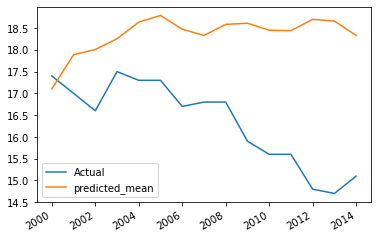

In [96]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df.loc[:'2000-01-01','CO2'], order=(28, 1 ,0))
results = arima.fit()
predictions = results.predict('2000-01-01', '2014-01-01')

plt.plot(df.loc['2000-01-01':,'CO2'],label='Actual')
predictions.plot()
plt.legend();


print('RMSE',np.sqrt(mean_squared_error(df.loc['2000-01-01':,'CO2'],predictions)))
print('MAE',mean_absolute_error(df.loc['2000-01-01':,'CO2'],predictions))

RMSE 1.2570547506689438
MAE 0.9656005971128415


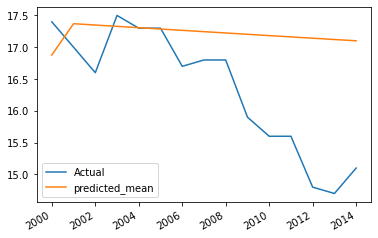

In [151]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df.loc[:'2000-01-01','CO2'], order=(1, 0 ,1))
results = arima.fit()
predictions = results.predict('2000-01-01', '2014-01-01')

plt.plot(df.loc['2000-01-01':,'CO2'],label='Actual')
predictions.plot()
plt.legend();


print('RMSE',np.sqrt(mean_squared_error(df.loc['2000-01-01':,'CO2'],predictions)))
print('MAE',mean_absolute_error(df.loc['2000-01-01':,'CO2'],predictions))

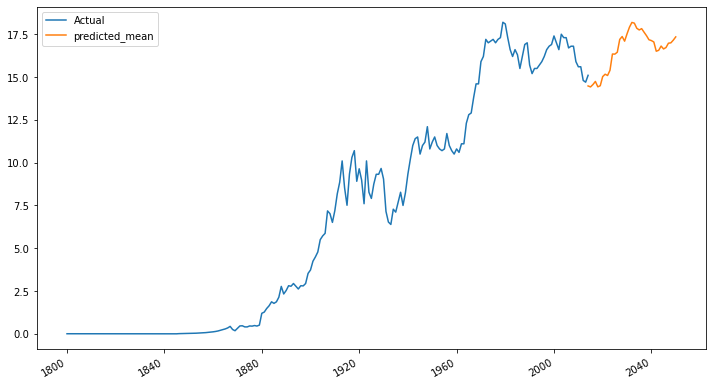

In [169]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df.loc[:,'CO2'], order=(28, 2 ,20))
resultf = arima.fit()
predictionf = resultf.predict('2014-01-01', '2050-01-01')
plt.figure(figsize=(12,7))
plt.plot(df.loc[:,'CO2'],label='Actual')
predictionf.plot()
plt.legend();

#print('RMSE',np.sqrt(mean_squared_error(df.loc['2000-01-01':,'CO2'],predictions)))
#print('MAE',mean_absolute_error(df.loc['2000-01-01':,'CO2'],predictions))
#print('MAPE',mean_absolute_percentage_error(df.loc['2000-01-01':,'CO2'],predictions)*100)

In [170]:
import pickle
with open('arimaf.pkl', 'wb') as pkl:
    pickle.dump(resultf, pkl)
with open('arimaf.pkl', 'rb') as pkl:
    pickle_preds = pickle.load(pkl)

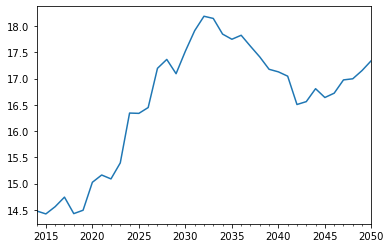

In [171]:
pickle_preds.predict('2014-01-01', '2050-01-01').plot()

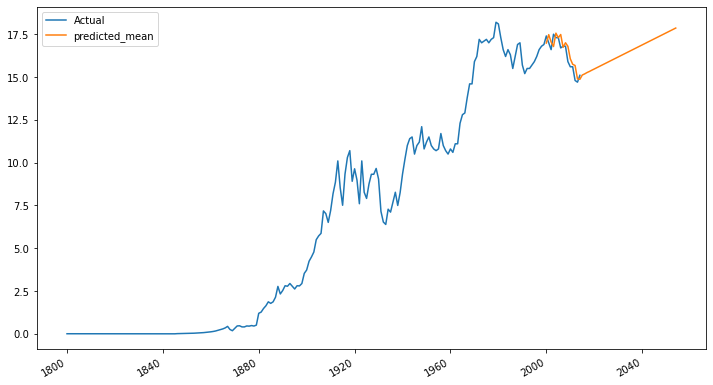

In [149]:
from statsmodels.tsa.arima.model import ARIMA

arima = ARIMA(df.loc[:,'CO2'], order=(2, 2, 2))
results = arima.fit()
predictions = results.predict('2000-01-01', '2054-01-01')
plt.figure(figsize=(12,7))

plt.plot(df.loc[:,'CO2'],label='Actual')
predictions.plot()
plt.legend();

#print('RMSE',np.sqrt(mean_squared_error(df.loc['2000-01-01':,'CO2'],predictions)))
#print('MAE',mean_absolute_error(df.loc['2000-01-01':,'CO2'],predictions))
#print('MAPE',mean_absolute_percentage_error(df.loc['2000-01-01':,'CO2'],predictions)*100)